<a href="https://colab.research.google.com/github/shivavarma2001/homework-ML2/blob/main/Copy_of_homework_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

for d in [1, 2, 3]:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    print(f"Depth={d} | Train acc={accuracy_score(y_train, clf.predict(X_train)):.3f} "
          f"| Test acc={accuracy_score(y_test, clf.predict(X_test)):.3f}")


Depth=1 | Train acc=0.667 | Test acc=0.667
Depth=2 | Train acc=0.971 | Test acc=0.889
Depth=3 | Train acc=0.981 | Test acc=0.978


k=1 | Test acc=0.667


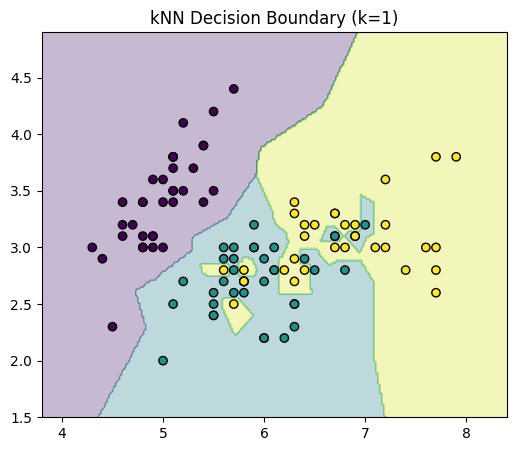

k=3 | Test acc=0.667


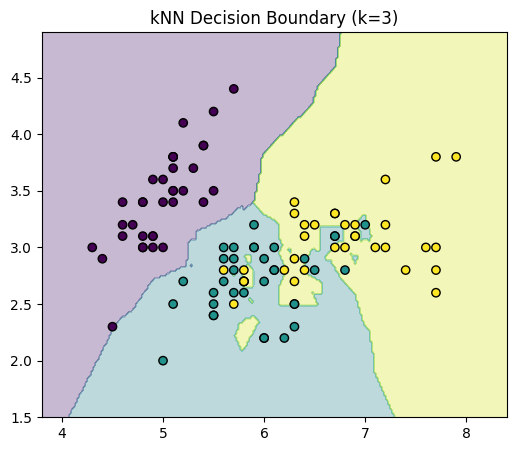

k=5 | Test acc=0.800


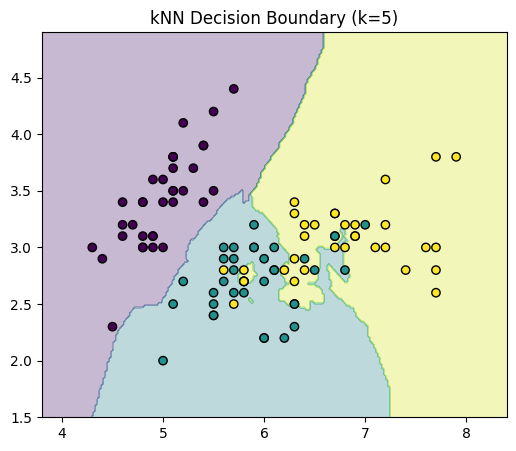

k=10 | Test acc=0.756


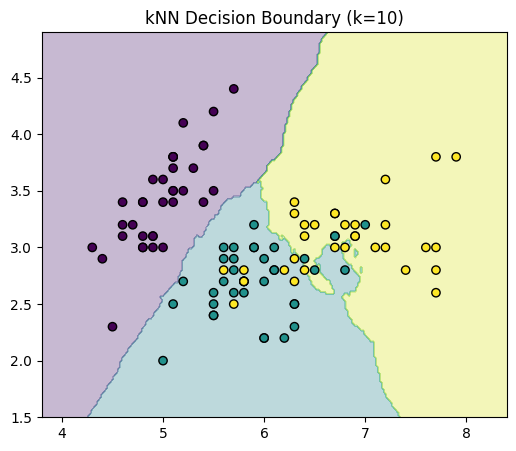

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

feature_idx = [0, 1]  # sepal length, sepal width
X2 = iris.data[:, feature_idx]
y2 = iris.target
Xtr, Xte, ytr, yte = train_test_split(
    X2, y2, test_size=0.3, random_state=42, stratify=y2
)

def plot_decision_boundary(knn, X, y, k):
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")
    plt.title(f"kNN Decision Boundary (k={k})")
    plt.show()

for k in [1,3,5,10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtr, ytr)
    acc = accuracy_score(yte, knn.predict(Xte))
    print(f"k={k} | Test acc={acc:.3f}")
    plot_decision_boundary(knn, Xtr, ytr, k)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.938     1.000     0.968        15
           2      1.000     0.933     0.966        15

    accuracy                          0.978        45
   macro avg      0.979     0.978     0.978        45
weighted avg      0.979     0.978     0.978        45



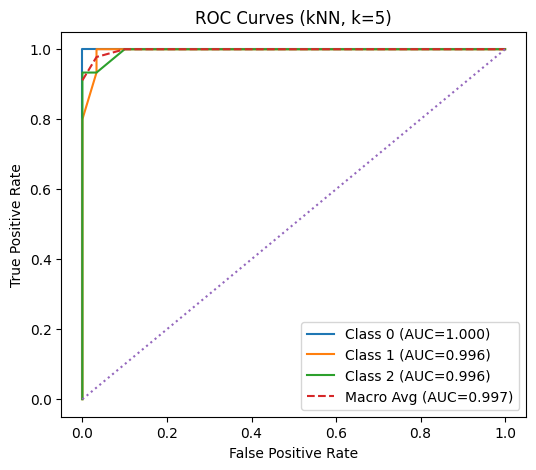

Macro-average AUC: 0.997


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = knn5.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in roc_auc]))
mean_tpr = np.zeros_like(all_fpr)
for i in roc_auc:
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(roc_auc)
macro_auc = auc(all_fpr, mean_tpr)

plt.figure(figsize=(6,5))
for i in roc_auc:
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC={roc_auc[i]:.3f})")
plt.plot(all_fpr, mean_tpr, linestyle="--", label=f"Macro Avg (AUC={macro_auc:.3f})")
plt.plot([0,1],[0,1], linestyle=":")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves (kNN, k=5)")
plt.legend(); plt.show()

print(f"Macro-average AUC: {macro_auc:.3f}")